# Figure generation for different state distributions

In [1]:
# External modules.
import copy
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import poisson

# Internal modules.
from setup.directories import img_path
from setup.results import my_ext
from setup.utils import makedir_safe

In [2]:
# Make a directory to store images, if one doesn't exist already.
makedir_safe(img_path)

In [3]:
# Compute probabilities.
num_severity_levels = 5
values = []
raw_probs = []
for k in range(0, num_severity_levels+1):
    values += [k]
    prob = poisson.pmf(k=k, mu=1.0, loc=0.0)
    raw_probs += [prob]
    print("Prob(k={}) = {}".format(k, prob))
#print(raw_probs)
clipped_probs = copy.deepcopy(raw_probs)
cumulative_prob = np.array(raw_probs).sum()
extra_prob = 1.0-cumulative_prob
print("Cumulative probability up to {}:".format(num_severity_levels), cumulative_prob)
#print(clipped_probs)
clipped_probs[-1] += extra_prob
#print(clipped_probs)
reversed_probs = clipped_probs[::-1] # make a copy of reversed list
#print(reversed_probs)
# REF: https://stackoverflow.com/a/60807295
uniform_probs = [1.0 / (num_severity_levels+1) for i in range(num_severity_levels+1)]
#print(uniform_probs)

Prob(k=0) = 0.36787944117144233
Prob(k=1) = 0.36787944117144233
Prob(k=2) = 0.18393972058572114
Prob(k=3) = 0.06131324019524039
Prob(k=4) = 0.015328310048810101
Prob(k=5) = 0.00306566200976202
Cumulative probability up to 5: 0.9994058151824183


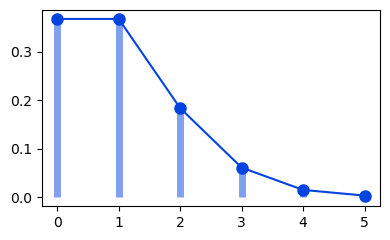

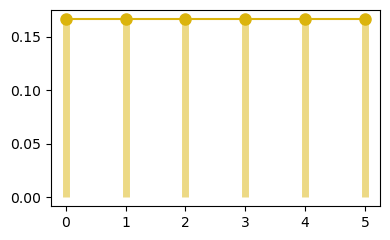

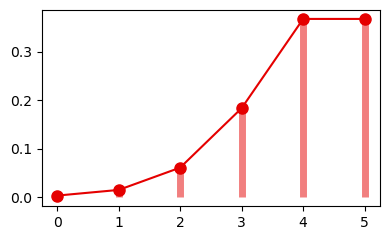

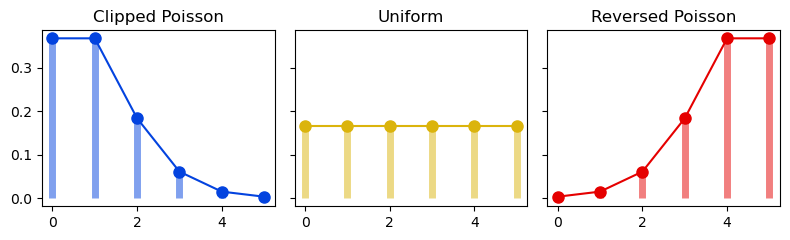

In [4]:
fig, ax = plt.subplots(1, figsize=(4, 2.5))
ax.plot(np.array(values), np.array(clipped_probs), color="xkcd:blue", marker="o", ms=8, label="poisson pmf")
ax.vlines(np.array(values), ymin=0, ymax=np.array(clipped_probs), colors="xkcd:blue", lw=5, alpha=0.5)
plt.tight_layout()
fname = os.path.join(img_path, "state_probs_poisson.{}".format(my_ext))
plt.savefig(fname=fname)
plt.show()

fig, ax = plt.subplots(1, figsize=(4, 2.5))
ax.plot(np.array(values), np.array(uniform_probs), color="xkcd:gold", marker="o", ms=8, label="uniform pmf")
ax.vlines(np.array(values), ymin=0, ymax=np.array(uniform_probs), colors="xkcd:gold", lw=5, alpha=0.5)
plt.tight_layout()
fname = os.path.join(img_path, "state_probs_uniform.{}".format(my_ext))
plt.savefig(fname=fname)
plt.show()

fig, ax = plt.subplots(1, figsize=(4, 2.5))
ax.plot(np.array(values), np.array(reversed_probs), color="xkcd:red", marker="o", ms=8, label="reverse poisson pmf")
ax.vlines(np.array(values), ymin=0, ymax=np.array(reversed_probs), colors="xkcd:red", lw=5, alpha=0.5)
plt.tight_layout()
fname = os.path.join(img_path, "state_probs_reversed.{}".format(my_ext))
plt.savefig(fname=fname)
plt.show()

#fig, (ax1, ax2, ax3) = plt.subplots(1, figsize=(4, 2.5))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 2.5), sharey=True)
ax1.plot(np.array(values), np.array(clipped_probs), color="xkcd:blue", marker="o", ms=8, label="poisson pmf")
ax1.vlines(np.array(values), ymin=0, ymax=np.array(clipped_probs), colors="xkcd:blue", lw=5, alpha=0.5)
ax1.set_title("Clipped Poisson")
ax2.plot(np.array(values), np.array(uniform_probs), color="xkcd:gold", marker="o", ms=8, label="uniform pmf")
ax2.vlines(np.array(values), ymin=0, ymax=np.array(uniform_probs), colors="xkcd:gold", lw=5, alpha=0.5)
ax2.set_title("Uniform")
ax3.plot(np.array(values), np.array(reversed_probs), color="xkcd:red", marker="o", ms=8, label="reverse poisson pmf")
ax3.vlines(np.array(values), ymin=0, ymax=np.array(reversed_probs), colors="xkcd:red", lw=5, alpha=0.5)
ax3.set_title("Reversed Poisson")
plt.tight_layout()
fname = os.path.join(img_path, "state_probs_all.{}".format(my_ext))
plt.savefig(fname=fname)
plt.show()

___